In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
DataServicios = pd.read_csv('EvalServicios.csv')

In [4]:
DataServicios

id_servicios                                       Cuestionario
0              10  {"Pregunta_1":"4","Pregunta_2":"4","Pregunta_3...
1              11  {"Pregunta_1":"3","Pregunta_2":"4","Pregunta_3...
2              12  {"Pregunta_1":"4","Pregunta_2":"4","Pregunta_3...
3              13  {"Pregunta_1":"4","Pregunta_2":"4","Pregunta_3...
4              14  {"Pregunta_1":"4","Pregunta_2":"4","Pregunta_3...
..            ...                                                ...
226           237  {"Pregunta_1":"4","Pregunta_2":"4","Pregunta_3...
227           238  {"Pregunta_1":"4","Pregunta_2":"4","Pregunta_3...
228           239  {"Pregunta_1":"4","Pregunta_2":"4","Pregunta_3...
229           240  {"Pregunta_1":"4","Pregunta_2":"3","Pregunta_3...
230           241  {"Pregunta_1":"4","Pregunta_2":"3","Pregunta_3...

[231 rows x 2 columns]

In [5]:
PreguntasServicios = []
for i in range(1,len(DataServicios)):
    DictQues = json.loads(DataServicios['Cuestionario'][i])
    for s in range(1,11):
        DKey = 'Pregunta_' + str(s)
        DictQues[DKey] = int(DictQues[DKey])
    if DictQues['comentario'] == 'Escribe aquí tus comentarios. (Recuerda borrar este texto antes de escribir tu comentario)':
        DictQues['comentario'] = ' '
    PreguntasServicios.append(DictQues)

In [6]:
dfAnswers = pd.DataFrame(PreguntasServicios)

In [7]:
dfAnswers.head()

Pregunta_1  Pregunta_2  Pregunta_3  Pregunta_4  Pregunta_5  Pregunta_6  \
0           3           4           3           4           4           4   
1           4           4           4           4           3           4   
2           4           4           4           4           3           4   
3           4           4           4           4           4           4   
4           4           4           3           4           4           4   

   Pregunta_7  Pregunta_8  Pregunta_9  Pregunta_10  \
0           4           4           3            4   
1           3           3           3            4   
2           4           4           4            4   
3           4           4           4            4   
4           4           4           4            4   

                                          comentario  
0  Estar mas al pendiente de los estudiantes tant...  
1                                                     
2  Una excelente universidad, muy amables todos ,...  
3                                                     
4

In [8]:
dfAnswers.to_csv('RespuestasInstalaciones.csv',encoding='utf-8-sig')

In [9]:
text = dfAnswers['comentario'].values

Generando Word Cloud

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

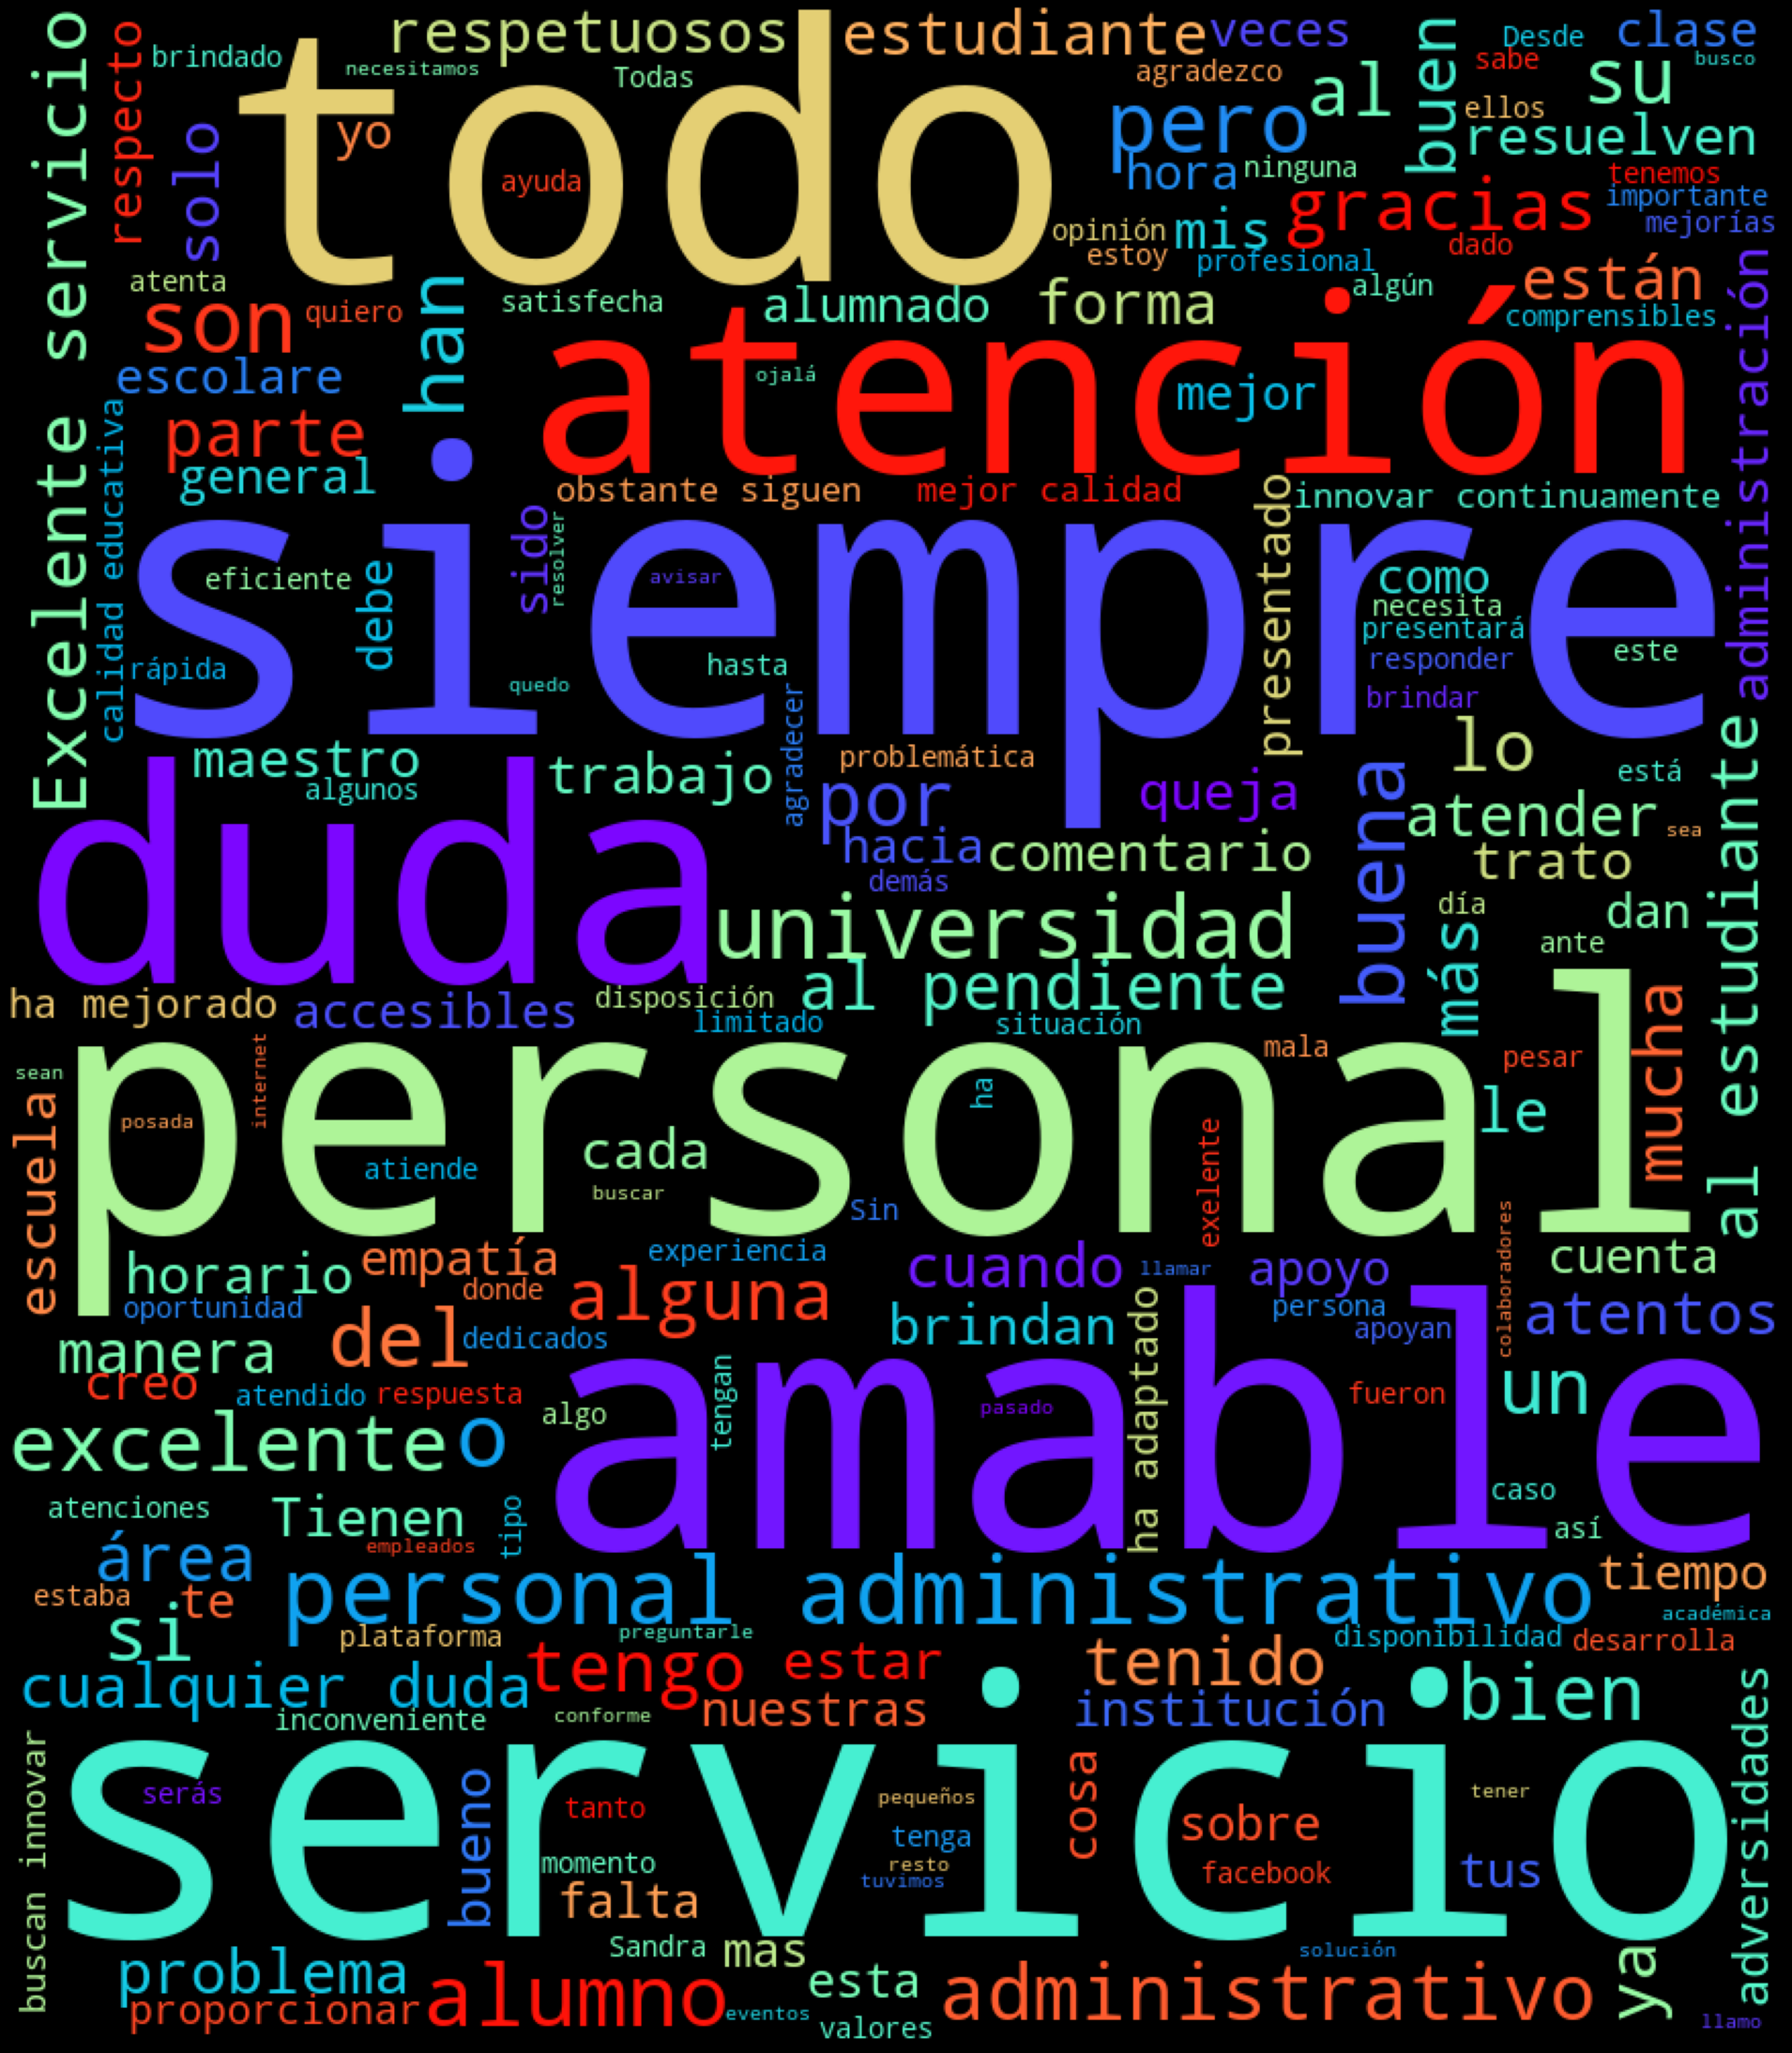

In [59]:
logo_mask = np.array(Image.open('mask_uniens.png'))
stop_words = ["el","se","de","y","que","la","para","los","en","con","una","mi",".","nos","es","las","tu","muy"] + list(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, random_state=1,
background_color='black',colormap='rainbow',mask=logo_mask, stopwords=stop_words).generate(' '.join(text))
plt.figure(figsize=(60,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('WordCloudGeneral.png')

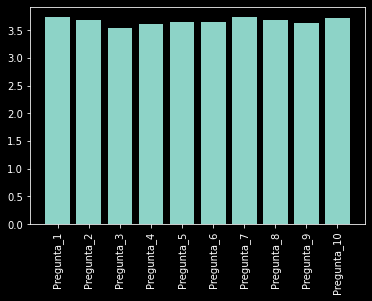

In [86]:
Xdata = dfAnswers.columns.values.tolist()[0:10]
Ydata = (dfAnswers.iloc[:,0:10].mean(axis=0))
plt.xticks(rotation=90)
plt.bar(Xdata,Ydata)
plt.show()



In [82]:
Xdata

['Pregunta_1',
 'Pregunta_2',
 'Pregunta_3',
 'Pregunta_4',
 'Pregunta_5',
 'Pregunta_6',
 'Pregunta_7',
 'Pregunta_8',
 'Pregunta_9',
 'Pregunta_10']

In [83]:
Ydata

0      3.7
1      3.6
2      3.9
3      4.0
4      3.9
      ... 
225    4.0
226    3.9
227    3.6
228    2.9
229    2.9
Length: 230, dtype: float64